<a href="https://colab.research.google.com/github/nicholaskernan/Machine-Learning-/blob/master/MultiCaptcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#This program trains a neural network to crack Captcha images containing 4 characters
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data_utils 
from torch.utils.data import TensorDataset, DataLoader
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
print(torch.__version__)
import os
from torch.autograd import Variable



1.4.0


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


RIJ0 tensor([27., 18., 19.,  0.])
XAWD tensor([33., 10., 32., 13.])
M1Z3 tensor([22.,  1., 35.,  3.])
E9QX tensor([14.,  9., 26., 33.])
FNCY tensor([15., 23., 12., 34.])
AFUT tensor([10., 15., 30., 29.])
0GB3 tensor([ 0., 16., 11.,  3.])
GIZB tensor([16., 18., 35., 11.])
TN03 tensor([29., 23.,  0.,  3.])
F2GS tensor([15.,  2., 16., 28.])
123R tensor([ 1.,  2.,  3., 27.])
IOB1 tensor([18., 24., 11.,  1.])
Y2ER tensor([34.,  2., 14., 27.])
BWH8 tensor([11., 32., 17.,  8.])
CD7G tensor([12., 13.,  7., 16.])
QFSG tensor([26., 15., 28., 16.])
RMGD tensor([27., 22., 16., 13.])
QV8V tensor([26., 31.,  8., 31.])
TE5C tensor([29., 14.,  5., 12.])
5U1J tensor([ 5., 30.,  1., 19.])
8RDO tensor([ 8., 27., 13., 24.])
TEVE tensor([29., 14., 31., 14.])
YL68 tensor([34., 21.,  6.,  8.])
12HD tensor([ 1.,  2., 17., 13.])
6U59 tensor([ 6., 30.,  5.,  9.])
9UI2 tensor([ 9., 30., 18.,  2.])
27J3 tensor([ 2.,  7., 19.,  3.])
OD98 tensor([24., 13.,  9.,  8.])
D5VX tensor([13.,  5., 31., 33.])
BK9K tensor([1

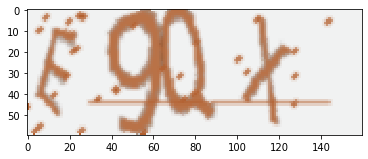

In [0]:
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
count = 0

label_tensor = torch.empty(500, 4)  #used a small training size of only 500 to be faster, still seemed to work fine (there probably isnt much variation in the code-generated captcha)


#root_path = 'gdrive/My Drive/1charac/'

for filename in glob.glob('gdrive/My Drive/Colab Notebooks/miniCaptcha/*.png'): #iterates through each picture in the folder
  label = filename[-8: -4]
  mini_tensor = torch.empty(4)
  for i in range(4):
    nick = ord(label[i]) - 48 #converts characters to numbers
    if(nick > 9):
      nick = nick - 7
    mini_tensor[i] = nick
  label_tensor[count] = mini_tensor
  print(label, mini_tensor)
  
  
  count = count + 1
  im = Image.open(filename)
  trans = transforms.ToTensor()
  if(count == 1): 
    image_tensor = torch.Tensor(trans(im)) #creates tensor if first time
  elif(count == 2):
    new_tensor = torch.Tensor(trans(im))
    image_tensor = torch.stack([image_tensor, new_tensor]) #adds in new dimension
  else:
    new_tensor = torch.unsqueeze(torch.Tensor(trans(im)), dim = 0) 
    image_tensor = torch.cat([image_tensor, new_tensor])  #adds in same dimension
    
    
lab_tensor = label_tensor.long()
print(lab_tensor)
ntrans = transforms.ToPILImage()
plt.imshow(ntrans(image_tensor[3]))
print(image_tensor.shape)


In [0]:
print(image_tensor.shape)
print(lab_tensor)
print(lab_tensor[1][1])
label_tensor.shape

torch.Size([500, 3, 60, 160])
tensor([[27, 18, 19,  0],
        [33, 10, 32, 13],
        [22,  1, 35,  3],
        ...,
        [20, 19, 16, 25],
        [24, 26, 29,  4],
        [19, 20,  3, 32]])
tensor(10)


torch.Size([500, 4])

In [0]:
dataset = TensorDataset(image_tensor, lab_tensor)
batch_size = 500  #may have to equal training size
train_loader = DataLoader(dataset, batch_size= batch_size)


In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.layer1 = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2))
    self.layer2 = nn.Sequential(
      nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2))
    self.drop_out = nn.Dropout() #dropout layer to avoid overfitting
    
    self.fc1 = nn.Linear(40 * 15 * 64, 1000)
    self.fc2 = nn.Linear(1000, 36)
    #up until here, everything is identical to the 1 character captcha breaker
    
    self.fc3 = nn.Linear(40 * 15 * 64, 1000)
    self.fc4 = nn.Linear(1000, 36)
    
    self.fc5 = nn.Linear(40 * 15 * 64, 1000)
    self.fc6 = nn.Linear(1000, 36)
    
    self.fc7 = nn.Linear(40 * 15 * 64, 1000)
    self.fc8 = nn.Linear(1000, 36)
  def forward(self, x, prev, n): #method is now recursive
    if(n == 0):
      return prev
    if(n == 1): 
      out = self.fc7(x)
      out = self.fc8(out)
      out = torch.unsqueeze(out, dim = 0) 
      out = torch.cat([prev, out])
    if(n == 2):
      out = self.fc5(x)
      out = self.fc6(out)
      out = torch.unsqueeze(out, dim = 0) 
      out = torch.cat([prev, out]) #adds in same dimension
    if(n == 3):
      out = self.fc3(x)
      out = self.fc4(out)
      out = torch.stack([prev, out]) #adds in new dimension
    if(n == 4):
      new_x = self.layer1(x)
      new_x = self.layer2(new_x)
      new_x = new_x.reshape(x.size(0), -1) #flattens data dimensions into 1 x ...
      new_x = self.drop_out(new_x)  #randomly turns some elements to 0
      out = self.fc1(new_x)
      out = self.fc2(out)
      x = new_x
      #add to tensor
    return self.forward(x, out, n-1)

In [0]:
model = ConvNet()
learning_rate = .001
# Loss and optimizer
criterion = nn.CrossEntropyLoss()   #just log loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
num_epochs = 75  #required a lot of passes to get good accuracy
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
    
          outputs = model(images, torch.empty(1), 4) #the second parameter doesn't do anything here, just syntatically required
      
          for x in range(4):
            label = labels[:, x:x+1]  #grabs a column
            label = label.reshape(label.size(0)) #flattens it so the criterion function can be called
            if(x == 0):
              loss = criterion(outputs[x], label)
            else:
              loss = loss + criterion(outputs[x], label) #combines the four loss functions into one

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total = labels.size(0) * 4 #I based accuracy off of total number of characters correct, so multiply by 4
          correct = 0
          
          reformat = torch.empty(batch_size, 4)  #this tensor is just to make the output look nicer
          
          for x in range(4): 
            labs = labels[:, x:x+1]
            labs.transpose_(0, 1)
            nick, predicted = torch.max(outputs[x].data, 1)  #predicted collects the index value of the highest probability
            correct = correct + (predicted == labs).sum().item() 
            reformat[:, x] = predicted

          for x in range(batch_size):
            labs = labels[x, :]
            if(x == 0): #the if statement is just to make the output less annoying
              print("Predicted:  ", reformat[x])
              print("Actual:     ",    labs)
            
          

          print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
          (correct / total) * 100))


Predicted:   tensor([ 9.,  3., 35., 27.])
Actual:      tensor([27, 18, 19,  0])
Epoch [1/75], Step [1/1], Loss: 14.3422, Accuracy: 2.90%
Predicted:   tensor([ 5., 14.,  9., 13.])
Actual:      tensor([27, 18, 19,  0])
Epoch [2/75], Step [1/1], Loss: 44.5834, Accuracy: 4.65%
Predicted:   tensor([ 1., 20., 29.,  8.])
Actual:      tensor([27, 18, 19,  0])
Epoch [3/75], Step [1/1], Loss: 23.0841, Accuracy: 4.40%
Predicted:   tensor([ 8., 28., 35.,  3.])
Actual:      tensor([27, 18, 19,  0])
Epoch [4/75], Step [1/1], Loss: 16.0534, Accuracy: 3.80%
Predicted:   tensor([26., 23., 33.,  3.])
Actual:      tensor([27, 18, 19,  0])
Epoch [5/75], Step [1/1], Loss: 14.6780, Accuracy: 3.55%
Predicted:   tensor([26., 31., 33., 15.])
Actual:      tensor([27, 18, 19,  0])
Epoch [6/75], Step [1/1], Loss: 14.3614, Accuracy: 5.30%
Predicted:   tensor([ 3., 31., 22.,  5.])
Actual:      tensor([27, 18, 19,  0])
Epoch [7/75], Step [1/1], Loss: 14.3192, Accuracy: 5.85%
Predicted:   tensor([ 5.,  3.,  3., 32.])

torch.Size([100, 3, 60, 160])


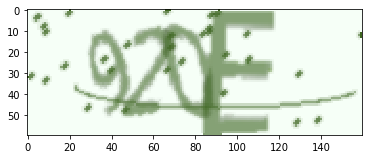

In [0]:
#this cell is identical to the one that created the tensors for the training dataset, only it iterates through a different folder

count = 0
while(count > 0):
  nick = 5


label_tensor = torch.empty(100, 4)
root_path = 'gdrive/My Drive/1charac/'

for filename in glob.glob('gdrive/My Drive/Colab Notebooks/testCaptcha/*.png'): 
  label = filename[-8: -4]
  mini_tensor = torch.empty(4)
  for i in range(4):
    nick = ord(label[i]) - 48
    if(nick > 9):
      nick = nick - 7
    mini_tensor[i] = nick
  label_tensor[count] = mini_tensor
  #print(label, mini_tensor)
  
  
  count = count + 1
  im = Image.open(filename)
  trans = transforms.ToTensor()
  if(count == 1): 
    image_tensor = torch.Tensor(trans(im))
  elif(count == 2):
    new_tensor = torch.Tensor(trans(im))
    image_tensor = torch.stack([image_tensor, new_tensor])
        #label_tensor = torch.stack([label_tensor, torch.Tensor(nick)])
  else:
    new_tensor = torch.unsqueeze(torch.Tensor(trans(im)), dim = 0) 
    image_tensor = torch.cat([image_tensor, new_tensor])  #may have to only do this every certain number of its
    
    
lab_tensor = label_tensor.long()
ntrans = transforms.ToPILImage()
plt.imshow(ntrans(image_tensor[0]))
print(image_tensor.shape)
#print(lab_tensor)

In [0]:
dataset = TensorDataset(image_tensor, lab_tensor)
test_loader = DataLoader(dataset, batch_size= 20)


In [0]:
for i, (images, labels) in enumerate(train_loader): #identical to the run through the training set, except without the loss functions
  
        outputs = model(images, torch.empty(1), 4)
        total = labels.size(0) * 4
        correct = 0
        reformat = torch.empty(batch_size, 4)
        
        for x in range(4):
          labs = labels[:, x:x+1]
          labs.transpose_(0, 1)
          nick, predicted = torch.max(outputs[x].data, 1)  #the highest probability value is the one the machine predicts, second output of max is the index value
          correct = correct + (predicted == labs).sum().item() 
          reformat[:, x] = predicted
          
        for x in range(batch_size):
          labs = labels[x, :]
          print("Predicted:  ", reformat[x])
          print("Actual:     ",    labs)
          
        percent = correct/total * 100
        print("Accuracy: ", percent, "%")
        
        

Predicted:   tensor([27., 18., 19.,  0.])
Actual:      tensor([27, 18, 19,  0])
Predicted:   tensor([33., 10., 32., 13.])
Actual:      tensor([33, 10, 32, 13])
Predicted:   tensor([22.,  1., 35.,  3.])
Actual:      tensor([22,  1, 35,  3])
Predicted:   tensor([14., 33., 26., 33.])
Actual:      tensor([14,  9, 26, 33])
Predicted:   tensor([15., 23., 12., 34.])
Actual:      tensor([15, 23, 12, 34])
Predicted:   tensor([10., 15., 30., 29.])
Actual:      tensor([10, 15, 30, 29])
Predicted:   tensor([ 0., 16., 11.,  3.])
Actual:      tensor([ 0, 16, 11,  3])
Predicted:   tensor([16., 18., 35., 11.])
Actual:      tensor([16, 18, 35, 11])
Predicted:   tensor([29., 23.,  0., 10.])
Actual:      tensor([29, 23,  0,  3])
Predicted:   tensor([15.,  2., 16., 28.])
Actual:      tensor([15,  2, 16, 28])
Predicted:   tensor([ 1.,  2.,  3., 27.])
Actual:      tensor([ 1,  2,  3, 27])
Predicted:   tensor([18., 24., 11.,  1.])
Actual:      tensor([18, 24, 11,  1])
Predicted:   tensor([34.,  2., 14., 27.]